In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
tf.__version__

'2.18.0'

In [6]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")
x=dataset.iloc[:, 3:-1].values
y=dataset.iloc[:, -1].values #exit dependent varialble

In [7]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [8]:
print(y)

[1 0 1 ... 1 1 0]


# Encoding Categorical data

In [9]:
#lebel encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])

In [10]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [11]:
#one hot encoding in geography column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')#first column
x=np.array(ct.fit_transform(x));

In [12]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [13]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
#feature scaling
# Save the trained ANN model
ann.save("churn_model.h5")

# Save the StandardScaler object
import joblib
joblib.dump(sc, "scaler.pkl")

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Artificial Neural networks

In [15]:
#initializing the ANN
ann=tf.keras.models.Sequential()


In [16]:
#Adding the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [17]:
#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [18]:
#Adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Training ANN

In [19]:
#Compiling the ANN
ann.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics =['accuracy'])

In [20]:
#Training the ANN on Training set
ann.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5365 - loss: 0.6989
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8028 - loss: 0.5039
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.4644
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8046 - loss: 0.4336
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - loss: 0.4211
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8268 - loss: 0.3969
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8401 - loss: 0.3847
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8357 - loss: 0.3880
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8420 - loss: 0.3724
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8562 - loss: 0.3520
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8475 - loss: 0.3616
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [21]:
#Making the predictions and evaluation the model
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[False]]


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


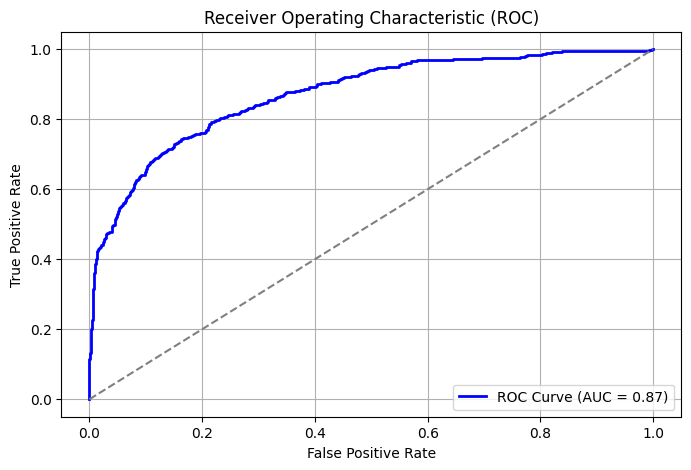

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [40]:
#predicting the Test set Results
# 1. Predict probabilities
y_pred = ann.predict(x_test)

# 2. Plot ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. Then apply threshold
y_pred = (y_pred > 0.3)

# 4. Compare predictions with actual labels
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))


In [41]:
#Making Confusion Matrix
#output 1511 is correct pred that customer stays in bank
#218 leave the bank
#84 is incorrect leave the bank
#187  incorrect to stays in bank
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1388  207]
 [ 120  285]]


0.8365

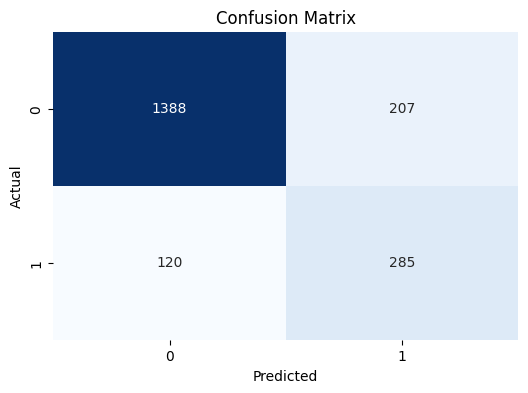

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


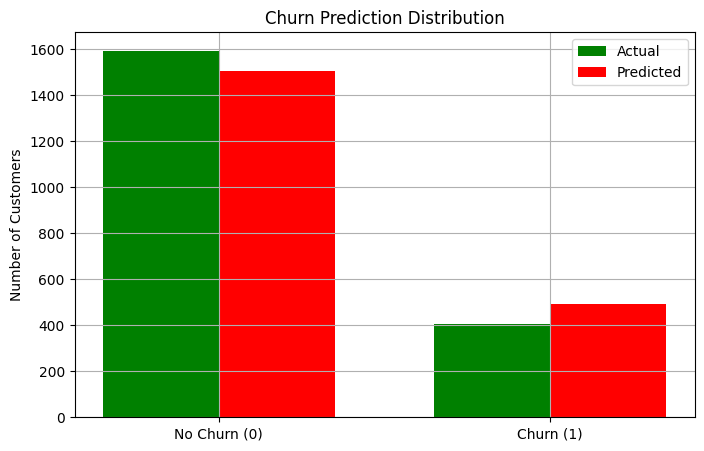

In [43]:
import matplotlib.pyplot as plt

labels = ['No Churn (0)', 'Churn (1)']
actual_counts = [np.sum(y_test==0), np.sum(y_test==1)]
pred_counts = [np.sum(y_pred==0), np.sum(y_pred==1)]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, actual_counts, width, label='Actual', color='green')
plt.bar(x + width/2, pred_counts, width, label='Predicted', color='red')
plt.ylabel('Number of Customers')
plt.title('Churn Prediction Distribution')
plt.xticks(x, labels)
plt.legend()
plt.grid(True)
plt.show()


In [47]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
import joblib

# Load model and scaler
model = tf.keras.models.load_model('churn_model.h5')
scaler = joblib.load('scaler.pkl')

st.title("🔍 Churn Prediction App")

# Inputs
gender = st.selectbox("Gender", ["Male", "Female"])
geography = st.selectbox("Geography", ["France", "Germany", "Spain"])
credit_score = st.number_input("Credit Score", value=600)
age = st.slider("Age", 18, 100, 40)
tenure = st.slider("Tenure (Years)", 0, 10, 3)
balance = st.number_input("Balance", value=60000.0)
num_products = st.selectbox("Number of Products", [1, 2, 3])
has_cr_card = st.selectbox("Has Credit Card?", [0, 1])
is_active_member = st.selectbox("Is Active Member?", [0, 1])
estimated_salary = st.number_input("Estimated Salary", value=50000.0)

# Encode gender
gender = 1 if gender == "Male" else 0

# Encode geography (one hot)
geo_france = 1 if geography == "France" else 0
geo_germany = 1 if geography == "Germany" else 0
geo_spain = 1 if geography == "Spain" else 0

# Create input array
final_input = [[geo_france, geo_germany, geo_spain, credit_score, gender, age,
                tenure, balance, num_products, has_cr_card, is_active_member, estimated_salary]]

final_input_scaled = scaler.transform(final_input)

# Predict
if st.button("Predict Churn"):
    result = model.predict(final_input_scaled)[0][0]
    st.write(f"Prediction Score: {result:.2f}")
    if result > 0.3:
        st.error("⚠️ Customer likely to CHURN")
    else:
        st.success("✅ Customer likely to STAY")


Writing app.py


In [44]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 409.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [45]:
!pip install pyngrok

In [48]:
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [51]:
!ngrok config add-authtoken 2onVuOAzNkm62sBqwm0GoULfaZW_3tcy227sPy4WwxZfzm3ut


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [53]:
from pyngrok import ngrok

# Corrected line
public_url = ngrok.connect(8501, "http")

print("🔗 Your Streamlit app is live at:", public_url)



🔗 Your Streamlit app is live at: NgrokTunnel: "https://41f8a6bf85f2.ngrok-free.app" -> "http://localhost:8501"
